# Practice on Keras Functional API

In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
# for types hints
from typing import Tuple, Callable, List
from tensorflow import Tensor

2023-08-19 23:42:47.591552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 23:42:48.841337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# check for gpus
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# list their names
tf.config.experimental.list_physical_devices('GPU')

Num GPUs Available:  1


2023-08-19 23:42:50.580176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-19 23:42:50.615817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-19 23:42:50.616060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# mnist dataset
def load_and_preprocess_mnist() -> Tuple[Tuple[Tensor, Tensor], Tuple[Tensor, Tensor]]:
    """
    Load the MNIST dataset, preprocess images, and perform one-hot encoding of labels.

    :return: Tuple of training data (x_train, y_train) and testing data (x_test, y_test).
    """
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()

    # Reshape and normalize images
    x_train = x_train.reshape(60000, 784).astype('float32') / 255
    x_test = x_test.reshape(10000, 784).astype('float32') / 255

    # One-hot encoding of labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [4]:

(x_train, y_train), (x_test, y_test) = load_and_preprocess_mnist()


In [5]:
# building the model
def build_model() -> tf.keras.Model:
    """
    Build a simple MLP model for MNIST classification.
    :return: A tf.keras Model with inputs and outputs defined.
    """
    inputs = tf.keras.Input(shape=(784,), name='input')  # input layer
    x = tf.keras.layers.Dense(64, activation='relu', name='hidden1')(inputs)  # hidden layer
    x = tf.keras.layers.Dense(64, activation='relu', name='hidden2')(x)  # hidden layer
    outputs = tf.keras.layers.Dense(10, activation='softmax', name='output')(x)  # output layer
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model_ce = build_model()
model_fl = build_model()
model_rl = build_model()

2023-08-19 23:42:58.692530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-19 23:42:58.692825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-19 23:42:58.693079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-19 23:43:00.183085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-19 23:43:00.183494: I tensorflow/compile

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
ce_loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.CategoricalAccuracy()]
# compiling the model
model_ce.compile(optimizer=optimizer, loss=ce_loss, metrics=metrics)
# training the model
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model_ce.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping_callback])
# evaluating the model
test_scores = model_ce.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1]*100)

# saving the model
path = './weights/mnist_ce_model.keras'
model_ce.save(path)

Epoch 1/100


2023-08-19 23:43:07.433119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-19 23:43:07.436598: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f60fa02ae20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-19 23:43:07.436632: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-08-19 23:43:07.664263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-19 23:43:07.739508: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


KeyboardInterrupt: 

In [11]:
focal_loss = tf.keras.losses.CategoricalFocalCrossentropy()
# compiling the model
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_fl.compile(optimizer=optimizer, loss=focal_loss, metrics=metrics)
# training the model
model_fl.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping_callback])
# evaluating the model
test_scores = model_fl.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1]*100)
# saving the model
path = './weights/mnist_focal_model.keras'
model_fl.save(path)

Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.4741 - categorical_accuracy: 0.2564 - val_loss: 0.4620 - val_categorical_accuracy: 0.1521
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4521 - categorical_accuracy: 0.1897 - val_loss: 0.4419 - val_categorical_accuracy: 0.2189
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4331 - categorical_accuracy: 0.2427 - val_loss: 0.4233 - val_categorical_accuracy: 0.2576
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4149 - categorical_accuracy: 0.2841 - val_loss: 0.4049 - val_categorical_accuracy: 0.3047
Epoch 5/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3965 - categorical_accuracy: 0.3312 - val_loss: 0.3859 - val_categorical_accuracy: 0.3588
Epoch 6/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3772 - categorical_accuracy: 0.3842 - val_loss: 0.3659 - val_categorical_accuracy: 0.417

In [10]:
# defining reciprocal loss function
# RL(p_t) = 1/p_t * -p * log(p_t)
    # TODO: plot the function
def reciprocal_loss(y_true, y_pred, reduction=tf.keras.losses.Reduction.AUTO):
    """
    reciprocal loss for multi-class classification, tf.keras style.
    RL(p_t) = - 1/p_t * log(p_t), where p_t is the probability associated with the true class.

    :param y_true: Ground truth labels, shape of [batch_size, num_classes].
    :param y_pred: Predicted class probabilities, shape of [batch_size, num_classes].
    :param reduction: Reduction method to apply to the loss (default tf.keras.losses.Reduction.NONE).
    :return: A scalar representing the mean reciprocal loss over the batch.
    NOTE: written assuming GPU support to make use of fast Tensor operations.
    """
    # Create a Categorical Cross-Entropy loss instance
    cce = tf.keras.losses.CategoricalCrossentropy(
        reduction=tf.keras.losses.Reduction.NONE # Keep unreduced loss tensor
    )
    # printing y_pred
    print(f'y_pred before clipping: {y_pred}')
    cross_entropy = cce(y_true, y_pred) # batch_sizex1
    print(f'cross entropy before clipping: {cross_entropy}')
    # adding clipping to avoid log(0)
    _y_pred = K.clip(y_pred, 1e-2, 1.0)

    print(f'_y_pred after clipping: {_y_pred}')
    # _y_pred = y_pred
    cross_entropy = cce(y_true, _y_pred) # batch_sizex1
    print(f'cross entropy after clipping: {cross_entropy}')
    # find the probability associated with the true class
    _y_true = K.argmax(y_true, axis=1)
    # get the predicted probability of the true class
    _y_pred = K.sum(_y_pred * y_true, axis=1)
    # print(f'y_true: {_y_true}')
    # print(f'y_pred: {_y_pred}')
    # print(f'cross entropy: {cross_entropy}')
    # reciprocal loss by dividing the cross entropy by the predicted probability of the true class
    _reciprocal_loss = cross_entropy / _y_pred # reciprocal loss
    
    if reduction == tf.keras.losses.Reduction.AUTO:
        return K.mean(_reciprocal_loss)
    elif reduction == tf.keras.losses.Reduction.SUM:
        return K.sum(_reciprocal_loss)
    else: # No reduction
        return _reciprocal_loss



In [11]:
# test reciprocal loss
y_true = np.array([[0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
# cross entropy value 
cce = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
print(f'cross entropy: {cce(y_true, y_pred)}')
print(f'reciprocal loss: {reciprocal_loss(y_true, y_pred, reduction=tf.keras.losses.Reduction.NONE)}')

# with auto
# cce = tf.keras.losses.CategoricalCrossentropy()
# print(f'cross entropy: {cce(y_true, y_pred)}')
# print(f'reciprocal loss: {reciprocal_loss(y_true, y_pred)}')



cross entropy: [0.05129329 2.30258509]
y_pred before clipping: [[0.05 0.95 0.  ]
 [0.1  0.8  0.1 ]]
cross entropy before clipping: [0.05129329 2.30258509]
_y_pred after clipping: [[0.05 0.95 0.01]
 [0.1  0.8  0.1 ]]
cross entropy after clipping: [0.06124363 2.30258509]
rational loss: [ 0.06446697 23.02585093]


In [14]:
# test with tf.keras.losses.CategoricalCrossentropy
y_true = np.array([[0, 1, 0], [0, 0, 1]]) # test targets 
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]]) # test predictions
# cross entropy objects
cce = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE) 
# cross entropy value without clipping
print(f'y_pred values without clipping: {y_pred}')
print(f'cross entropy values without clipping: {cce(y_true, y_pred)}')
# clipping
y_pred_clip = K.clip(y_pred, 1e-2, 1.0)
# cross entropy value with clipping
print(f'y_pred values with clipping: {y_pred_clip}')
print(f'cross entropy values with clipping: {cce(y_true, y_pred_clip)}')


y_pred values without clipping: [[0.05 0.95 0.  ]
 [0.1  0.8  0.1 ]]
cross entropy values without clipping: [0.05129329 2.30258509]
y_pred values with clipping: [[0.05 0.95 0.01]
 [0.1  0.8  0.1 ]]
cross entropy values with clipping: [0.06124363 2.30258509]


In [ ]:
# def generate_data() -> Tuple[np.ndarray, np.ndarray]:
#     """
#     Generates synthetic y_true and y_pred data.
#     :return: y_true and y_pred arrays.
#     """
#     num_samples = 100
#     num_classes = 3
#     y_true = np.eye(num_classes)[np.random.choice(num_classes, num_samples)]
#     y_pred = np.random.rand(num_samples, num_classes)
#     y_pred /= y_pred.sum(axis=1, keepdims=True)
#     return y_true, y_pred
# 
# def plot_reciprocal_loss() -> None:
#     """
#     Plots the reciprocal loss for the generated data.
#     """
#     y_true, y_pred = generate_data()
#     reciprocal_loss_fixed = reciprocal_loss()
#     losses: List[float] = [reciprocal_loss_fixed(y_t.reshape(1, -1), y_p.reshape(1, -1)).numpy() for y_t, y_p in zip(y_true, y_pred)]
#     plt.plot(losses)
#     plt.title("reciprocal loss for Multi-Class Classification")
#     plt.xlabel("Sample")
#     plt.ylabel("Loss")
#     plt.show()
# 
# plot_reciprocal_loss()

In [23]:
# build th emodel
model_rl = build_model()
# compiling the model
model_rl.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-4), loss=reciprocal_loss, metrics=metrics)
# training the model
history = model_rl.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping_callback])
# evaluating the model
test_scores = model_rl.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1]*100)
# saving the model
path = './weights/mnist_rational_model.keras'
model_rl.save(path)

Epoch 1/100
750/750 [==============================] - 6s 7ms/step - loss: 16.6794 - categorical_accuracy: 0.5020 - val_loss: 10.8696 - val_categorical_accuracy: 0.6659
Epoch 2/100
750/750 [==============================] - 5s 7ms/step - loss: 8.5468 - categorical_accuracy: 0.7109 - val_loss: 6.5331 - val_categorical_accuracy: 0.7752
Epoch 3/100
750/750 [==============================] - 5s 7ms/step - loss: 5.9381 - categorical_accuracy: 0.7729 - val_loss: 4.9975 - val_categorical_accuracy: 0.8163
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 4.8606 - categorical_accuracy: 0.8039 - val_loss: 4.2614 - val_categorical_accuracy: 0.8341
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 4.2687 - categorical_accuracy: 0.8251 - val_loss: 3.8196 - val_categorical_accuracy: 0.8469
Epoch 6/100
750/750 [==============================] - 4s 6ms/step - loss: 3.8786 - categorical_accuracy: 0.8388 - val_loss: 3.5407 - val_categorical_accuracy: 0.8

In [49]:
# rebuilding the models
model_ce = build_model()
model_fl = build_model()
model_rl = build_model()


In [45]:
# imbalance 
def create_imbalanced_data(x, y, imbalance_rate=0.5):
    """
    Create an imbalanced dataset based on a given probability distribution.
    The probability for class d is given by: P(d) = 0.5^d / 2*(1 - 0.5^10)

    :param x: Features, shape of [total_samples, feature_dim].
    :param y: One-hot encoded labels, shape of [total_samples, num_classes].
    :param imbalance_rate: Base rate for the exponential decay of class frequency (default 0.5).
    :return: Tuple of imbalanced features and labels, shapes of [selected_samples, feature_dim] and [selected_samples, num_classes].
    """
    total_samples = len(y)
    a = imbalance_rate
    normalization_factor = 2 * (1 - a**10)

    indices_by_class = [np.where(y[:, d] == 1)[0] for d in range(10)]
    selected_indices = []

    for d in range(10):
        probability_d = (a**d) / normalization_factor
        frequency = int(total_samples * probability_d)
        np.random.shuffle(indices_by_class[d]) # Shuffle to ensure random selection
        selected_indices.extend(indices_by_class[d][:frequency])

    return x[selected_indices], y[selected_indices]


x_train_imbalanced, y_train_imbalanced = create_imbalanced_data(x_train, y_train)


In [56]:
# compiling the model
model_ce.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=metrics)
model_fl.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalFocalCrossentropy(), metrics=metrics)
model_rl.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-4), loss=reciprocal_loss, metrics=metrics)

In [57]:
print("Training on imbalanced data:")
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
print("Cross Entropy:")
model_ce.fit(x_train_imbalanced, y_train_imbalanced, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])
print("Focal Loss:")
model_fl.fit(x_train_imbalanced, y_train_imbalanced, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])
print("reciprocal loss:")
model_rl.fit(x_train_imbalanced, y_train_imbalanced, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])

Training on imbalanced data:
Cross Entropy:
Epoch 1/100
326/326 [==============================] - 3s 9ms/step - loss: 0.3517 - categorical_accuracy: 0.8817 - val_loss: 5.0706 - val_categorical_accuracy: 0.2576
Epoch 2/100
326/326 [==============================] - 3s 8ms/step - loss: 0.1418 - categorical_accuracy: 0.9622 - val_loss: 5.7580 - val_categorical_accuracy: 0.2618
Epoch 3/100
326/326 [==============================] - 3s 8ms/step - loss: 0.1142 - categorical_accuracy: 0.9669 - val_loss: 6.1194 - val_categorical_accuracy: 0.2693
Epoch 4/100
326/326 [==============================] - 3s 8ms/step - loss: 0.1013 - categorical_accuracy: 0.9699 - val_loss: 6.3808 - val_categorical_accuracy: 0.2735
Epoch 5/100
326/326 [==============================] - 3s 8ms/step - loss: 0.0934 - categorical_accuracy: 0.9714 - val_loss: 6.5419 - val_categorical_accuracy: 0.2762
Epoch 6/100
326/326 [==============================] - 3s 8ms/step - loss: 0.0877 - categorical_accuracy: 0.9726 - val_lo

In [58]:
# Balanced data
print("test on balanced set:")
ce_res = model_ce.evaluate(x_test, y_test)
fl_res = model_fl.evaluate(x_test, y_test)
rl_res = model_rl.evaluate(x_test, y_test)
print(f'ce: test loss {ce_res[0]}, test accuracy {ce_res[1]*100}')
print(f'fl: test loss {fl_res[0]}, test accuracy {fl_res[1]*100}')
print(f'rl: test loss {rl_res[0]}, test accuracy {rl_res[1]*100}')
# Imbalanced data
print("test on imbalanced data:")
x_test_imbalanced, y_test_imbalanced = create_imbalanced_data(x_test, y_test)
ce_ires = model_ce.evaluate(x_test_imbalanced, y_test_imbalanced)
fl_ires = model_fl.evaluate(x_test_imbalanced, y_test_imbalanced)
rl_ires = model_rl.evaluate(x_test_imbalanced, y_test_imbalanced)
print(f'ce: test loss {ce_ires[0]}, test accuracy {ce_ires[1]*100}')
print(f'fl: test loss {fl_ires[0]}, test accuracy {fl_ires[1]*100}')
print(f'rl: test loss {rl_ires[0]}, test accuracy {rl_ires[1]*100}')

test on balanced set:
313/313 [==============================] - 2s 5ms/step - loss: 268.0774 - categorical_accuracy: 0.3792
ce: test loss 4.289544582366943, test accuracy 39.739999175071716
fl: test loss 0.6095591187477112, test accuracy 33.3299994468689
rl: test loss 268.0774230957031, test accuracy 37.92000114917755
test on imbalanced data:
138/138 [==============================] - 1s 5ms/step - loss: 63.0856 - categorical_accuracy: 0.7922
ce: test loss 1.1457653045654297, test accuracy 82.69098997116089
fl: test loss 0.19733037054538727, test accuracy 72.45153784751892
rl: test loss 63.08560562133789, test accuracy 79.22462821006775


In [59]:
def accuracy_by_bins(model, x, y):
    """
    Calculate and print the accuracy of the given model for specific bins of classes.
    The bins are defined as: 0-1, 2-7, 8-9.

    :param model: Trained tf.keras model to evaluate.
    :param x: Input features, shape of [num_samples, feature_dim].
    :param y: One-hot encoded labels, shape of [num_samples, num_classes].
    """
    predictions = model.predict(x).argmax(axis=-1)
    true_labels = y.argmax(axis=-1)
    bins = [(0, 1), (2, 7), (8, 9)]
    for bin_start, bin_end in bins:
        mask = (true_labels >= bin_start) & (true_labels <= bin_end) 
        bin_accuracy = np.mean(predictions[mask] == true_labels[mask])
        print(f"Accuracy for bin {bin_start}-{bin_end}: {bin_accuracy*100}")

In [60]:
print("Accuracy by bins for balanced data:")
print("Cross Entropy:")
accuracy_by_bins(model_ce, x_test, y_test)
print("Focal Loss:")
accuracy_by_bins(model_fl, x_test, y_test)
print("reciprocal loss:")
accuracy_by_bins(model_rl, x_test, y_test)

Accuracy by bins for balanced data:
Cross Entropy:
313/313 [==============================] - 1s 3ms/step
Accuracy for bin 0-1: 99.14893617021276
Accuracy for bin 2-7: 31.80277871907828
Accuracy for bin 8-9: 0.0
Focal Loss:
313/313 [==============================] - 1s 2ms/step
Accuracy for bin 0-1: 96.31205673758865
Accuracy for bin 2-7: 21.9586580820061
Accuracy for bin 8-9: 0.0
Rational Loss:
313/313 [==============================] - 1s 2ms/step
Accuracy for bin 0-1: 96.92671394799054
Accuracy for bin 2-7: 29.515418502202646
Accuracy for bin 8-9: 0.0


In [61]:
print("Accuracy by bins for imbalanced data:")
print("Cross Entropy:")
accuracy_by_bins(model_ce, x_test_imbalanced, y_test_imbalanced)
print("Focal Loss:")
accuracy_by_bins(model_fl, x_test_imbalanced, y_test_imbalanced)
print("reciprocal loss:")
accuracy_by_bins(model_rl, x_test_imbalanced, y_test_imbalanced)

Accuracy by bins for imbalanced data:
Cross Entropy:
138/138 [==============================] - 1s 4ms/step
Accuracy for bin 0-1: 99.14893617021276
Accuracy for bin 2-7: 68.19803746654772
Accuracy for bin 8-9: 0.0
Focal Loss:
138/138 [==============================] - 0s 3ms/step
Accuracy for bin 0-1: 96.31205673758865
Accuracy for bin 2-7: 50.847457627118644
Accuracy for bin 8-9: 0.0
Rational Loss:
138/138 [==============================] - 0s 2ms/step
Accuracy for bin 0-1: 96.92671394799054
Accuracy for bin 2-7: 63.514719000892065
Accuracy for bin 8-9: 0.0


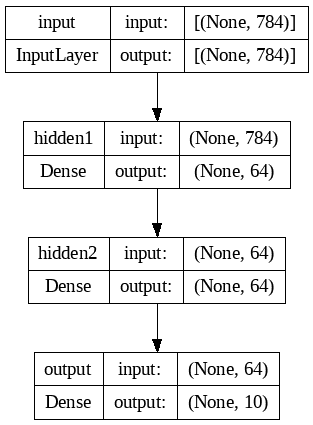

In [19]:
# plotting the model_rl
tf.keras.utils.plot_model(model_rl, "model_rl.png", show_shapes=True)